# **1. Problem Definition**

The goal is to classify credit card transactions as fraudulent or non-fraudulent based on historical transaction data.


# **2. Dataset Collection**

We used dataset the Kaggle " Credit Card Fraud Detection Dataset "


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
data=pd.read_csv("creditcard1.csv")
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [9]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


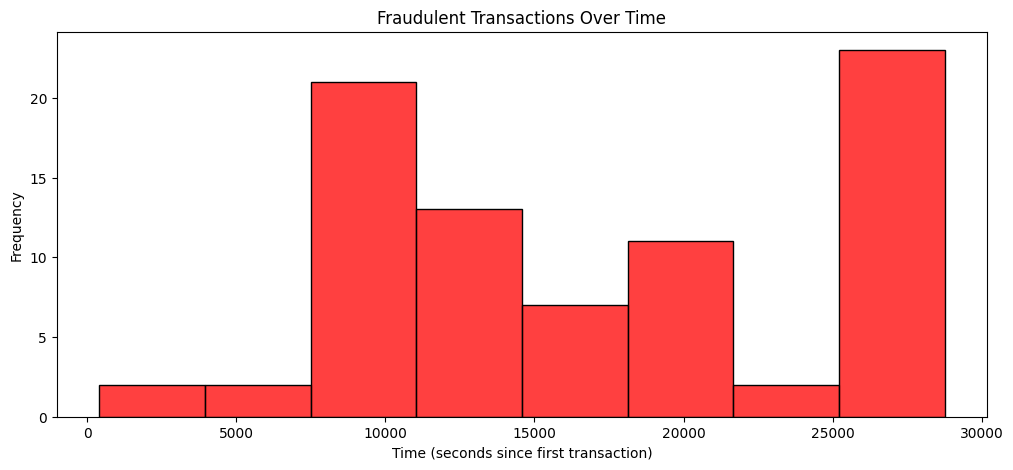

In [10]:
fraud_transactions = data[data['Class'] == 1]
plt.figure(figsize=(12, 5))
sns.histplot(fraud_transactions['Time'], color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

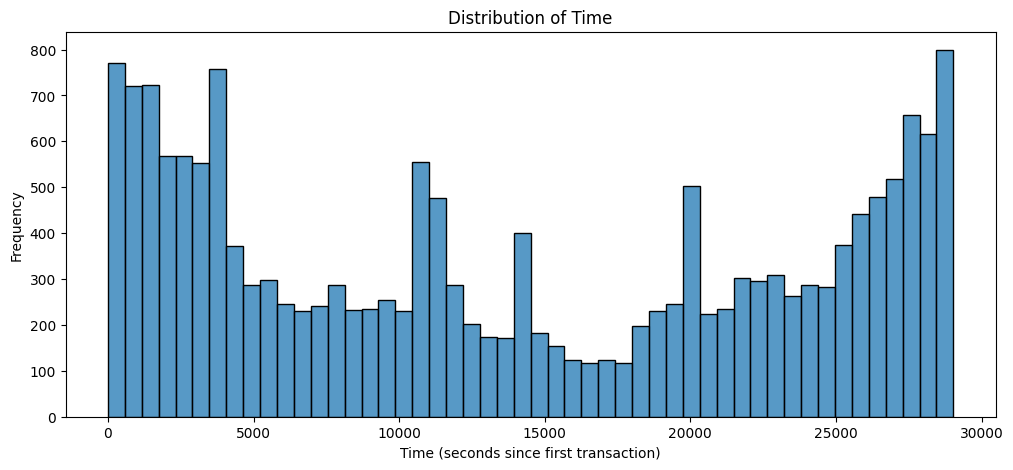

In [11]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Time'],bins=50)
plt.title('Distribution of Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-e38ad59d15de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set1',hue=None)


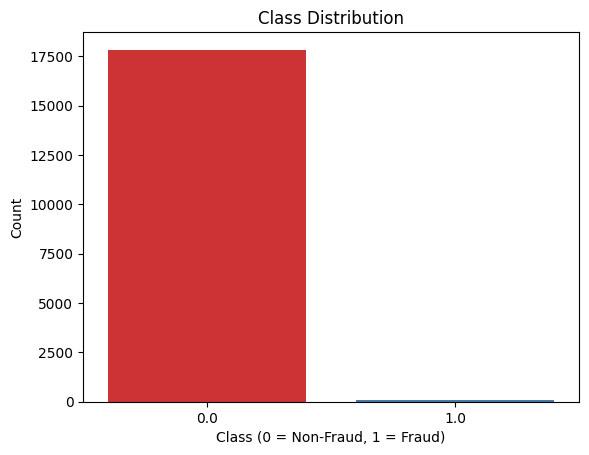

In [12]:
sns.countplot(x='Class', data=data, palette='Set1',hue=None)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

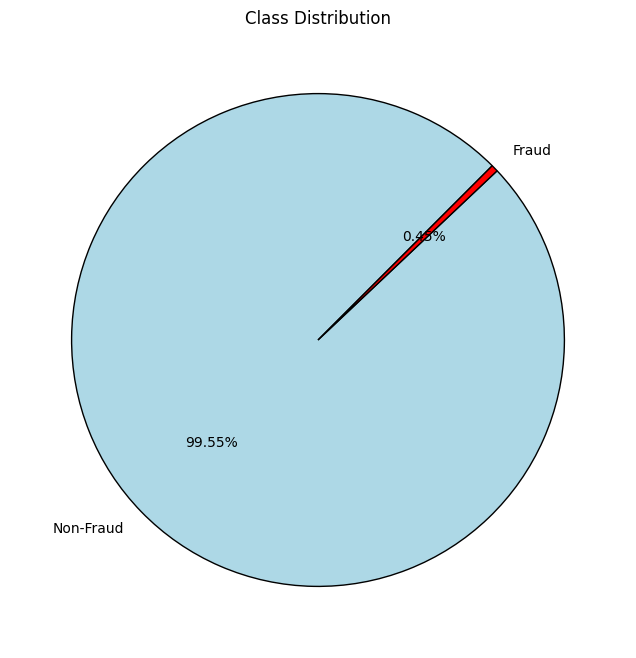

In [13]:
class_counts = data['Class'].value_counts()

# Labels and sizes for the pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = [class_counts[0], class_counts[1]]
colors = ['lightblue', 'red']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=45, wedgeprops={'edgecolor': 'black'})
plt.title('Class Distribution')
plt.show()

In [14]:
class_counts = data['Class'].value_counts()

print("Count of Non-Fraud Transactions (Class 0):", class_counts[0])
print("Count of Fraudulent Transactions (Class 1):", class_counts[1])

Count of Non-Fraud Transactions (Class 0): 17836
Count of Fraudulent Transactions (Class 1): 81


In [15]:
import pandas as pd

def count_outliers_iqr(data, columns):
    outliers_count = {}

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_count[col] = len(outliers)

    return outliers_count

numerical_columns = data.columns.drop(['Class','Amount'])
outliers = count_outliers_iqr(data, numerical_columns)

for col, count in outliers.items():
    print(f"Number of outliers in '{col}': {count}")


Number of outliers in 'Time': 0
Number of outliers in 'V1': 472
Number of outliers in 'V2': 999
Number of outliers in 'V3': 693
Number of outliers in 'V4': 255
Number of outliers in 'V5': 1171
Number of outliers in 'V6': 1610
Number of outliers in 'V7': 555
Number of outliers in 'V8': 1859
Number of outliers in 'V9': 306
Number of outliers in 'V10': 947
Number of outliers in 'V11': 115
Number of outliers in 'V12': 95
Number of outliers in 'V13': 20
Number of outliers in 'V14': 398
Number of outliers in 'V15': 359
Number of outliers in 'V16': 348
Number of outliers in 'V17': 525
Number of outliers in 'V18': 698
Number of outliers in 'V19': 447
Number of outliers in 'V20': 1726
Number of outliers in 'V21': 1345
Number of outliers in 'V22': 218
Number of outliers in 'V23': 1250
Number of outliers in 'V24': 301
Number of outliers in 'V25': 398
Number of outliers in 'V26': 54
Number of outliers in 'V27': 2252
Number of outliers in 'V28': 3175


# **3. Data Preprocessing**


In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# Assuming `data` is your DataFrame
X = data.drop(['Class', 'Amount'], axis=1)
y = data['Class']

# Check and handle NaN values in `y`
print("Original class distribution (with NaNs):", Counter(y))

# Option 1: Drop rows with NaN in `y`
data = data.dropna(subset=['Class'])
X = data.drop(['Class', 'Amount'], axis=1)
y = data['Class']

y = y.fillna(0)

print("Class distribution after handling NaNs:", Counter(y))


Original class distribution (with NaNs): Counter({0.0: 17836, 1.0: 81, nan: 1})
Class distribution after handling NaNs: Counter({0.0: 17836, 1.0: 81})


In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train_resampled))


Resampled class distribution: Counter({0.0: 14268, 1.0: 14268})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14333, 29), (3584, 29), (14333,), (3584,))

# **4.Feature selection**

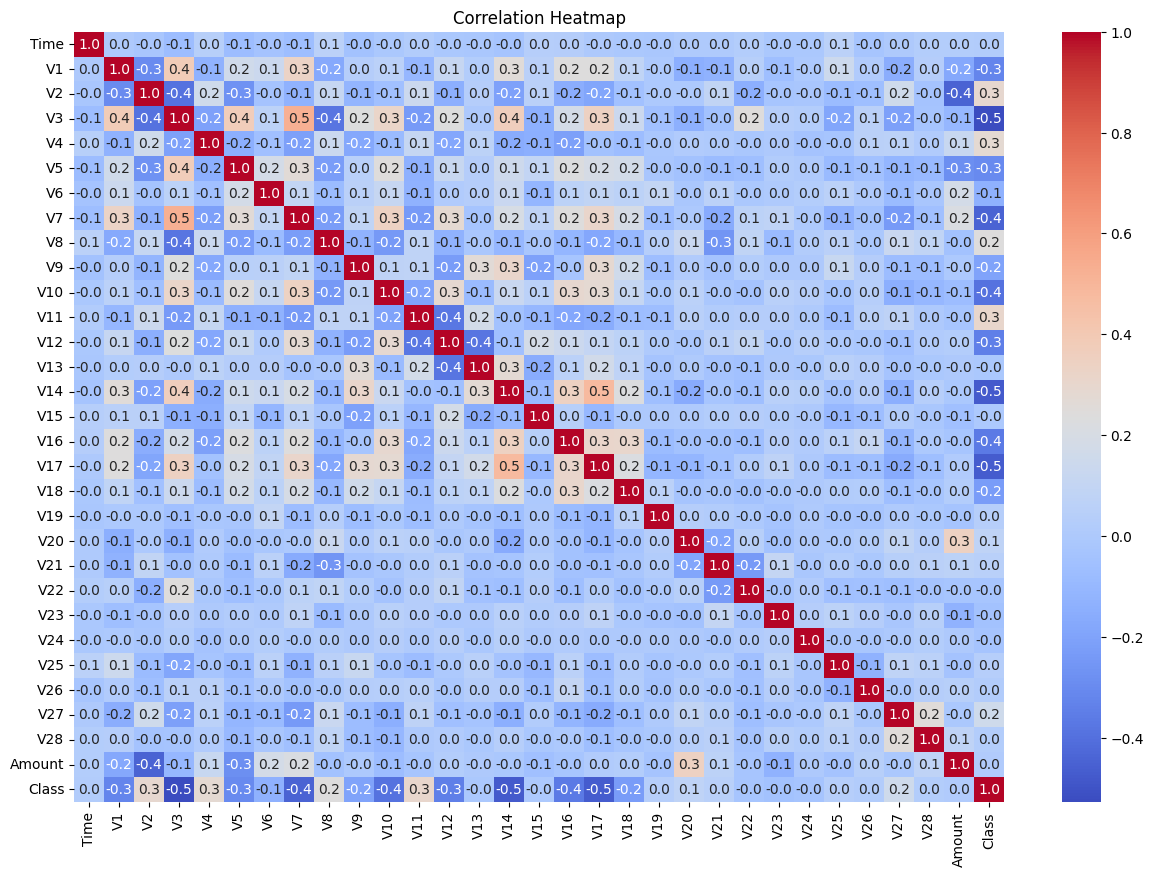

In [20]:
corr_matrix = data.corr()
corr_matrix
plt.figure(figsize=(15,10 ))
ccorr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are defined
print("Recursive Feature Elimination (RFE)...")

# Initialize Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Initialize RFE and fit the model
rfe = RFE(estimator=log_model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]

print("Selected Features:", selected_features_rfe)

Recursive Feature Elimination (RFE)...
Selected Features: Index(['V4', 'V14', 'V15', 'V19', 'V26'], dtype='object')


## **5.Model Selection**

**1. Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict the classes directly
y_pred = log_reg.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 98.77232142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3568
         1.0       0.27      1.00      0.42        16

    accuracy                           0.99      3584
   macro avg       0.63      0.99      0.71      3584
weighted avg       1.00      0.99      0.99      3584



**2. Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest
Accuracy: 99.94419642857143

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.89      1.00      0.94        16

    accuracy                           1.00      3584
   macro avg       0.94      1.00      0.97      3584
weighted avg       1.00      1.00      1.00      3584



**3. Decision Trees**

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 99.83258928571429

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.78      0.88      0.82        16

    accuracy                           1.00      3584
   macro avg       0.89      0.94      0.91      3584
weighted avg       1.00      1.00      1.00      3584



**4. XGBoost**

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds)*100)
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 99.88839285714286
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.83      0.94      0.88        16

    accuracy                           1.00      3584
   macro avg       0.92      0.97      0.94      3584
weighted avg       1.00      1.00      1.00      3584



**5. LightGBM**

In [26]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_preds)*100)
print(classification_report(y_test, lgbm_preds))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 65, number of negative: 14268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 14333, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004535 -> initscore=-5.391387
[LightGBM] [Info] Start training from score -5.391387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

**6. CatBoost**

In [27]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [28]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_preds = catboost_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, catboost_preds)*100)
print(classification_report(y_test, catboost_preds))

CatBoost Accuracy: 99.91629464285714
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.88      0.94      0.91        16

    accuracy                           1.00      3584
   macro avg       0.94      0.97      0.95      3584
weighted avg       1.00      1.00      1.00      3584



**7. Support Vector Machine**

In [29]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42,probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds)*100)
print(classification_report(y_test, svm_preds))

SVM Accuracy: 99.91629464285714
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3584
   macro avg       0.97      0.94      0.95      3584
weighted avg       1.00      1.00      1.00      3584

